In [41]:
from room_rate import models
from PIL import Image
import torch
import numpy as np
from matplotlib import pyplot as plt

from room_rate import lib, models

In [21]:
def load_images(dirname, outsize = (128, 128)):
    '''Load all images from dirname and downsample'''
    fnames = lib.get_imnames(dirname)
    ims = []
    for fname in fnames:
        im = Image.open(fname)
        im = im.resize(outsize)
        im = torch.tensor(np.array(im)).permute(2,0,1)
        ims.append(im)
    return ims

In [54]:
def get_trained_model(weights = '../models/MSE_Resnet18_Pretrained_noFeatureExtract_noAugment_1Epoch_LR1e-3.pt'):
    net = models.get_resnet(use_pretrained=False, feature_extract=False) #Resnet18 with single output (for rating)
    net.load_state_dict(torch.load(weights))
    net.eval()
    return net

In [55]:
net = get_trained_model()

In [56]:
def infer(im, renorm = True):
    im = lib.im_norm(im)
    rating = net(im.unsqueeze(0)).item()
    if renorm:
        rating = 2*(rating - 5)
    return rating

In [62]:
def load_rate_show(dirname):
    ims = load_images(dirname)
    for im in ims:
        plt.figure()
        plt.imshow(im.permute(1,2,0))
        plt.title(round(infer(im)))

In [75]:
def load_rate_subplot(dirname, save = None):
    plt.figure(figsize = (15,5))
    ims = load_images(dirname)
    for i, im in enumerate(ims):
        plt.subplot(1, len(ims), i+1)
        plt.imshow(im.permute(1,2,0))
        plt.title(round(infer(im)))
        plt.axis('off')
    if save is not None:
        plt.savefig(save)

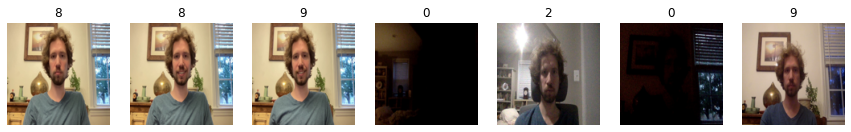

In [76]:
load_rate_subplot('../data/my_room', '../imgs/my_room.png')